# Descending into ML

Author: Gaurav Vaidya 

# Learning objectives

* A model is a way to predict the label for a given feature.
* Loss is a way of measuring how far the predicted label is from the actual label.

# Linear regression for fun and profit

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a method for finding the straight line or hyperplane that best fits a set of points. 

> If you remember this from previous mathematical training -- great! If not, just think of it as drawing a *line of best fit* on your data. And if you don't know what that is, don't worry, I'll show you!

# Working with the Iris flower dataset

Let's start by loading the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) introduced earlier.

In [23]:
import pandas
import numpy

iris_dataset = pandas.read_csv('../nb-datasets/iris_dataset.csv')

In [24]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_dataset.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

This refers to three species of plants:
* [*Iris versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor) (purple iris or poison flag),
* [*Iris virginica*](https://en.wikipedia.org/wiki/Iris_virginica) (Virginia iris), and
* [*Iris setosa*](https://en.wikipedia.org/wiki/Iris_setosa) (bristle-pointed iris).

# What's a "Sepal"?

![An image illustrating petals and sepals side by side](../nb-images/Petal-sepal.jpg)
![*Alcea rosea*, a plant with distinctive sepals and petals](../nb-images/Alcea_rosea3_ies.jpg)

A sepal is the green leaf-like structure found underneath the petal in many flowers. [Sepals](https://en.wikipedia.org/wiki/Sepal) provides protection for the flower when budding, and support for it once it is blooming.

Given that that is the case, we might expect plants with larger petals to also have larger sepals for additional support.

# Can we predict the length of the petal of a plant from the length of its sepal?

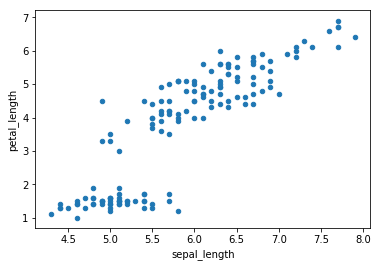

In [27]:
import matplotlib.pyplot as plt

iris_dataset.plot("sepal_length", "petal_length", kind="scatter")
plt.show()

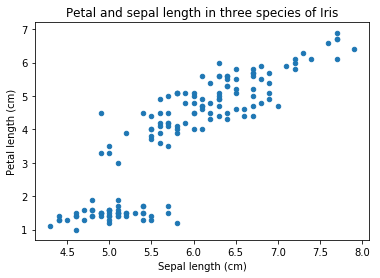

In [28]:
iris1 = iris_dataset.plot("sepal_length", "petal_length", kind="scatter", title="Petal and sepal length in three species of Iris")
iris1.set_xlabel("Sepal length (cm)")
iris1.set_ylabel("Petal length (cm)")
plt.show()

Looks like the answer is... yes! If we draw a line across the plot, we can *predict* what the petal length might be for a plant given a particular sepal length.

**That's all a model is!** -- something that can extrapolate from known data to predict what the value might be for a given input value.

# Linear regression can define that model precisely

Drawing a line by hand is fine, but we would like to determine exactly how the petal length varies as the sepal length varies. Luckily, `matplotlib` can run a linear regression for us easily.

In [29]:
iris_dataset.sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [30]:
iris_dataset.petal_length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

In [31]:
slope, intercept = numpy.polyfit(iris_dataset.sepal_length, iris_dataset.petal_length, deg=1)
print(slope, intercept)

1.8575096654214462 -7.0953814782793065


In other words, based on the available data, we can construct a model that predicts a petal length given a particular sepal length.

$$petal\_length = 1.8575 * sepal\_length - 7.095$$

> See that `1` in the call to `numpy.polyfit`? It tells it to fit a [polynomial in the degree 1](https://en.wikipedia.org/wiki/Degree_of_a_polynomial):
> $$y = slope * x + intercept$$
> You can increase this to fit a more complex polynomial. A degree 2 polynomial would look like this:
> $$y = (slope\ 1) * x^2 + (slope\ 2) * x + intercept$$
> What would happen if you fit a polynomial of a higher degree?

## The Equation of a Line

You may be familiar with this as the [equation of a line](https://en.wikipedia.org/wiki/Linear_equation#One_variable):

$$ y = mx + c $$

Note how easy it is to predict a petal value given a sepal value: you just plug it into the equation! For example:

In [32]:
# What is the predicted petal length when the sepal length is 5cm?
sepal_length = 5
petal_length = 1.8575 * sepal_length - 7.095
print(petal_length)

2.1925


In [33]:
# We could be more precise by plugging in the slope and intercept values directly.
petal_length = slope * sepal_length + intercept
print(petal_length)

2.1921668488279247


# Machine learning? For real?

Yes! By convention, we write this equation like this when thinking about it in machine-learning terms:

$$ y' = b + w_1x_1 $$

Where:
* $y'$ is the *predicted label* (the desired output), which in our example is the petal length in centimeters.
* $b$ is the *bias* (the y-intercept, sometimes referred to as $w_0$), which in our example is 7.095 cm.
* $w_1$ is the *weight* of feature 1, which is the same concept as the "slope" in the traditional equation of the line. In our example, this is 1.8575.
* $x_1$ is a *feature* (a known input), which in our example is the sepal length.

Writing it in this way makes it easy to extend our model when we are considering multiple features, such as sepal length and sepal width and many more. In that case, our equation would look like:

$$ y' = b + w_1x_1 + w_2x_2 + w_3x_3 + \ldots + w_nx_n $$
                                                        
                                                        
# What does this model actually look like?

We can draw this model onto our plot from earlier as a *line of best fit*.


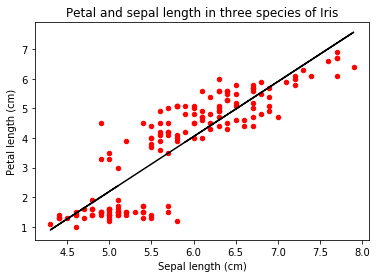

In [34]:
iris1 = iris_dataset.plot("sepal_length", "petal_length", kind="scatter", title="Petal and sepal length in three species of Iris", color="red")
iris1.set_xlabel("Sepal length (cm)")
iris1.set_ylabel("Petal length (cm)")
iris1.plot(iris_dataset.sepal_length, iris_dataset.sepal_length * slope + intercept, 'black')
plt.show()

# Err...

You might have noticed that this is *not* a very good model:

* There's a lot of points at the bottom of the figure that don't follow the predicted relationship.
* Petal sizes above 3cm seem to be increasing less quickly as sepal size increases than the predicted relationship.

Let's calculate the predicted petal length for each flower -- what does our model predict as compared to the actual petal length we see?

In [35]:
data = iris_dataset[['sepal_length', 'petal_length']].copy()
data['predicted_petal_length'] = data.sepal_length * slope + intercept
data.head()

,sepal_length,petal_length,predicted_petal_length
0,5.1,1.4,2.377918
1,4.9,1.4,2.006416
2,4.7,1.3,1.634914
3,4.6,1.5,1.449163
4,5.0,1.4,2.192167


If we plot the predicted petal length against the actual petal length, what would we expect to see?

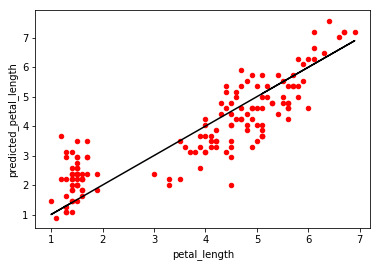

In [36]:
predicted1 = data.plot('petal_length', 'predicted_petal_length', kind='scatter', color='red')
predicted1.plot(data.petal_length, data.petal_length, 'black')
plt.show()

# Loss

Loss is a number indicating how bad the model's prediction was on a particular example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. **The goal of training a model is to find a set of *weights* and *biases* that have low loss, on average, across all examples.**

In this example, we have **150 data points** that provide a feature (the sepal length) as well as the label (the petal length). We can use these to determine how much loss our model has by calculating predicted labels and comparing them to the actual labels.

There are many different measures of loss. One common measure of loss that is particularly useful in linear regressions is *squared loss* (or $L_2$ loss). This is defined as *the square of the difference between the label and the prediction*. In other words, it is equal to:
$$ = (predicted\ label - actual\ label)^2 $$
$$ = (observation - prediction(x))^2 $$
$$ = (y - y')^2 $$

We can use this equation to find the loss for a single data point. What does this look like in Python?

In [37]:
data['squared_error'] = (data.petal_length - data.predicted_petal_length)**2
data.head()

,sepal_length,petal_length,predicted_petal_length,squared_error
0,5.1,1.4,2.377918,0.956323
1,4.9,1.4,2.006416,0.367740
2,4.7,1.3,1.634914,0.112167
3,4.6,1.5,1.449163,0.002584
4,5.0,1.4,2.192167,0.627528


But how do we find our the loss across all our 150 data points?

## Mean Square Error (MSE)

The Mean Square Error (MSE) can be calculated as the arithmetic mean of all squared losses in a particular dataset $D$. We can calculate this as the total squared loss divided by the number of data points, i.e.:

$$ MSE = \frac{1}{N} \sum_{(x, y)\ \in\ D}{(y - y')^2} $$

What does this look like in Python?

In [38]:
data.squared_error.mean()

0.7423201713947026

Tada!

We now have:
* A model that allows us to *predict* (or *infer*) the petal length from the sepal length within this dataset.
* A measure for determining how much the prediction varied from the actual *label*, i.e. its *loss*.
* A measure for determining how well the model performed on a particular dataset.

# Exercises

Here are a few exercises to test your understanding of this material.

## Exercise 1

In the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), we looked at whether we could predict the petal length based on sepal length.

For this exercise, try using the sepal width to predict petal width, find the equation of the line of best fit, and plot that line on the same graph.

In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt

# Import Iris dataset.
iris_dataset = # How can we load our dataset?

# Plot sepal widths against petal widths.
iris_dataset.plot(
  # How do we plot this dataset?
)
plt.show()

In [ ]:
# Hmm, this is NOT looking good. Oh well, let's see how awful it is!
# Construct our model.
slope, intercept = # How do we calculate the slope (weight) and intercept (bias).
print(slope, intercept)

In [ ]:
iris1 = iris_dataset.plot(
  # How do you plot a pretty graph?
)
iris1.set_xlabel("#TODO")
iris1.set_ylabel("#TODO")
iris1.plot(
  # How can you plot the line of best fit?
)
plt.show()

# Exercise 2

For the model that predicts petal length from sepal length in Exercise 1, calculate the Mean Square Error (MSE).

In [ ]:
# Calculate predicted petal widths.
iris_dataset['predicted_petal_width'] = # How?
iris_dataset['squared_error'] = # How??
print("The mean squared error is: ",
  # How???
)